# 主成分分析PCA

###   fit_transform() v.s. transform()
    根據對之前部分trainData進行fit的整體指標，對剩餘的資料（testData）使用同樣的均值、方差、最大最小值等指標進行轉換transform(testData)，對於train、test處理方式要相同。

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
#sys.path.append(os.path.abspath('../../common')) #for import common.utility
#from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## 載入Iris DataSet

In [2]:
iris = datasets.load_iris()
#print(iris.DESCR)
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].shape)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]  #only  select two featrues
iris_data.head(5)



(150, 4)
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 切割資料集 (training set, test set)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3, random_state=0)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [5]:
X_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
X_train_std[:5]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ]])

In [8]:
X_train_std[:5]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ]])

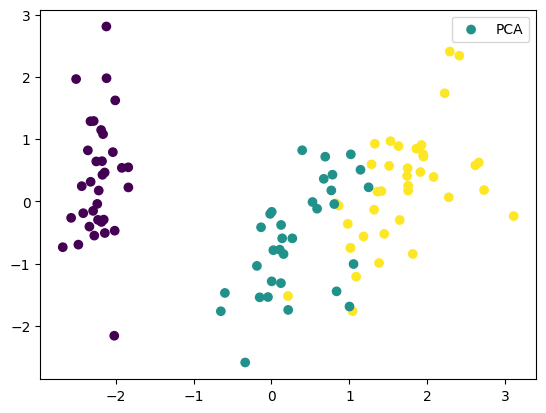

In [9]:
from sklearn.decomposition import PCA
# 主成分分析PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, label="PCA")
plt.legend()
plt.show()

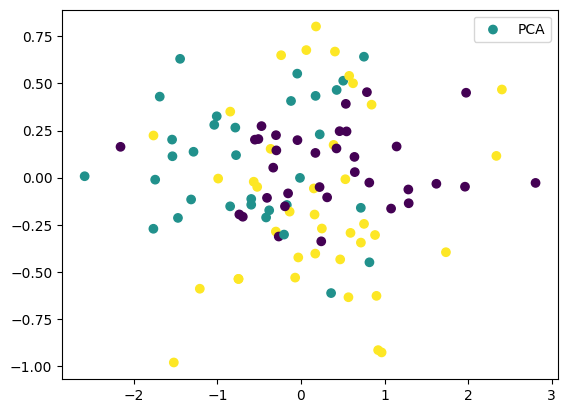

In [10]:
from sklearn.decomposition import PCA
# 主成分分析PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c= y_train, label="PCA")
plt.legend()
plt.show()

In [11]:
pca.explained_variance_ #eigen value

array([2.8998938 , 0.98708902, 0.13466453])

In [12]:
pca.explained_variance_/sum(pca.explained_variance_)

array([0.72107113, 0.24544395, 0.03348492])

In [13]:
pca.explained_variance_ratio_ #結果加起來會等於1

array([0.71806894, 0.24442204, 0.0333455 ])

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.71806894, 0.96249098, 0.99583649])

In [15]:
print(X_train_pca.shape)
print(y_train.shape)

(105, 3)
(105,)
